### Đồ Họa Dạng Sóng

Thông tin header của file WAV:
Số kênh: 2
Số byte mỗi mẫu: 2
Tần số mẫu: 44100 Hz
Tổng số mẫu: 355766
Thời lượng: 8.07 seconds


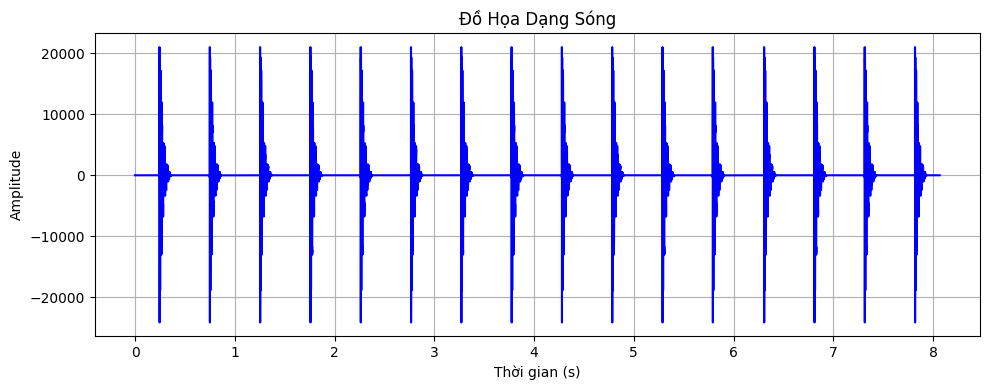

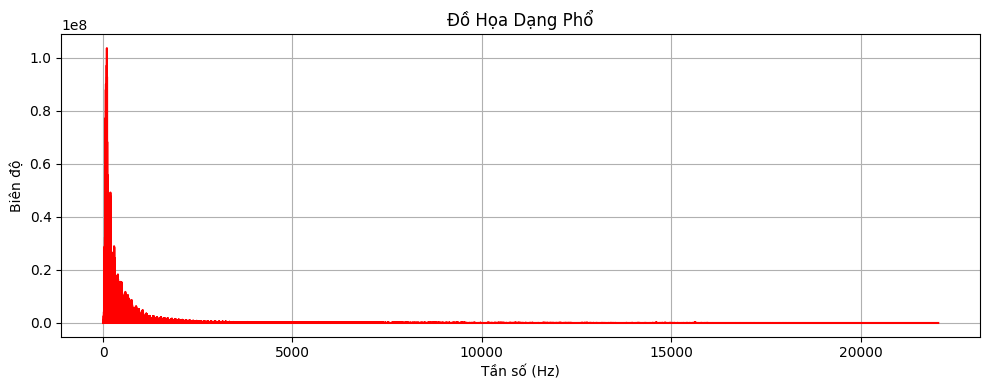

In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt

# Đường dẫn tới file WAV
file_path = "./WAV/102888__uknow-dude__drum-loop-solo-kick-119-bpm.wav"

# Mở file WAV và đọc thông tin header
with wave.open(file_path, "rb") as wav_file:
    # Lấy thông tin từ header
    n_channels = wav_file.getnchannels()  # Số kênh (mono hoặc stereo)
    sample_width = wav_file.getsampwidth()  # Số byte mỗi mẫu
    sample_rate = wav_file.getframerate()  # Tần số mẫu (Hz)
    n_frames = wav_file.getnframes()  # Tổng số mẫu
    duration = n_frames / sample_rate  # Thời lượng (seconds)

    print("Thông tin header của file WAV:")
    print(f"Số kênh: {n_channels}")
    print(f"Số byte mỗi mẫu: {sample_width}")
    print(f"Tần số mẫu: {sample_rate} Hz")
    print(f"Tổng số mẫu: {n_frames}")
    print(f"Thời lượng: {duration:.2f} seconds")

    # Đọc dữ liệu nhị phân
    raw_data = wav_file.readframes(n_frames)
    # Chuyển đổi sang mảng số nguyên
    audio_data = np.frombuffer(raw_data, dtype=np.int16)

    # Nếu là stereo, tách thành 2 kênh
    if n_channels == 2:
        audio_data = np.reshape(audio_data, (-1, 2))
        audio_data = audio_data[:, 0]  # Lấy kênh đầu tiên

# Tạo trục thời gian
time = np.linspace(0, duration, len(audio_data))

# Vẽ đồ họa dạng sóng
plt.figure(figsize=(10, 4))
plt.plot(time, audio_data, color="blue")
plt.title("Đồ Họa Dạng Sóng")
plt.xlabel("Thời gian (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

# Thực hiện FFT để chuyển tín hiệu từ miền thời gian sang miền tần số
# Sử dụng FFT cho phần dữ liệu âm thanh
n = len(audio_data)
frequencies = np.fft.fftfreq(n, 1/sample_rate)  # Tần số tương ứng
fft_values = np.fft.fft(audio_data)  # Kết quả FFT

# Lấy biên độ của phổ
magnitude = np.abs(fft_values)

# Lọc các tần số dương (vì FFT cho kết quả đối xứng)
positive_frequencies = frequencies[:n // 2]
positive_magnitude = magnitude[:n // 2]

# Vẽ đồ họa phổ (frequency spectrum)
plt.figure(figsize=(10, 4))
plt.plot(positive_frequencies, positive_magnitude, color="red")
plt.title("Đồ Họa Dạng Phổ")
plt.xlabel("Tần số (Hz)")
plt.ylabel("Biên độ")
plt.grid()
plt.tight_layout()
plt.show()


### Viết Tay FFT

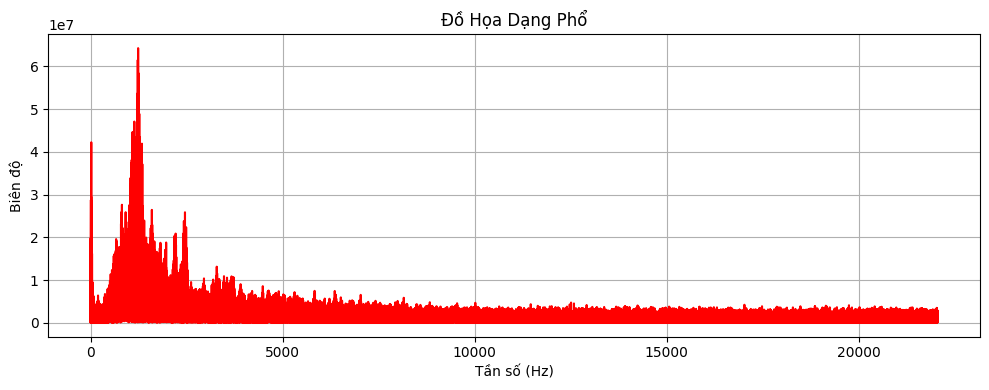

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm tính toán FFT đệ quy
def fft(x):
    N = len(x)
    if N <= 1:
        return x
    if N % 2 != 0:
        x = np.pad(x, (0, 1), mode='constant', constant_values=0)
        N += 1

    even = fft(x[0::2])  # Các chỉ số chẵn
    odd = fft(x[1::2])   # Các chỉ số lẻ
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

# Hàm lấy biên độ của kết quả FFT
def fft_magnitude(x):
    return np.abs(fft(x))

def fftfreq_custom(N, d=1.0):
    """
    Tạo trục tần số cho FFT.
    Args:
        N (int): Số điểm mẫu.
        d (float): Khoảng thời gian giữa các mẫu (1/tần số mẫu).
    Returns:
        numpy.ndarray: Trục tần số.
    """
    freqs = np.zeros(N)
    for i in range(N):
        if i < N // 2:
            freqs[i] = i / (N * d)
        else:
            freqs[i] = (i - N) / (N * d)
    return freqs


# Đọc và xử lý file WAV
file_path = "./WAV/102887__uknow-dude__drum-loop-solo-clap-2-119-bpm.wav"

import wave

# Mở file WAV
with wave.open(file_path, "rb") as wav_file:
    # Lấy thông tin từ header
    n_channels = wav_file.getnchannels()  # Số kênh (mono hoặc stereo)
    sample_width = wav_file.getsampwidth()  # Số byte mỗi mẫu
    sample_rate = wav_file.getframerate()  # Tần số mẫu (Hz)
    n_frames = wav_file.getnframes()  # Tổng số mẫu
    duration = n_frames / sample_rate  # Thời lượng (seconds)

    # Đọc dữ liệu nhị phân
    raw_data = wav_file.readframes(n_frames)
    # Chuyển đổi sang mảng số nguyên
    audio_data = np.frombuffer(raw_data, dtype=np.int16)

    # Nếu là stereo, tách thành 2 kênh
    if n_channels == 2:
        audio_data = np.reshape(audio_data, (-1, 2))
        audio_data = audio_data[:, 0]  # Lấy kênh đầu tiên

# Tính toán FFT và biên độ
magnitude = fft_magnitude(audio_data)

# Tạo trục tần số
#frequencies = np.fft.fftfreq(len(audio_data), 1/sample_rate)
frequencies = fftfreq_custom(len(audio_data), 1/sample_rate)


# Đảm bảo cả 2 mảng có kích thước giống nhau
min_len = min(len(frequencies), len(magnitude))
frequencies = frequencies[:min_len]
magnitude = magnitude[:min_len]

# Vẽ đồ họa phổ
plt.figure(figsize=(10, 4))
plt.plot(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2], color="red")
plt.title("Đồ Họa Dạng Phổ")
plt.xlabel("Tần số (Hz)")
plt.ylabel("Biên độ")
plt.grid()
plt.tight_layout()
plt.show()


### Test

Header Info: _wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=355766, comptype='NONE', compname='not compressed')


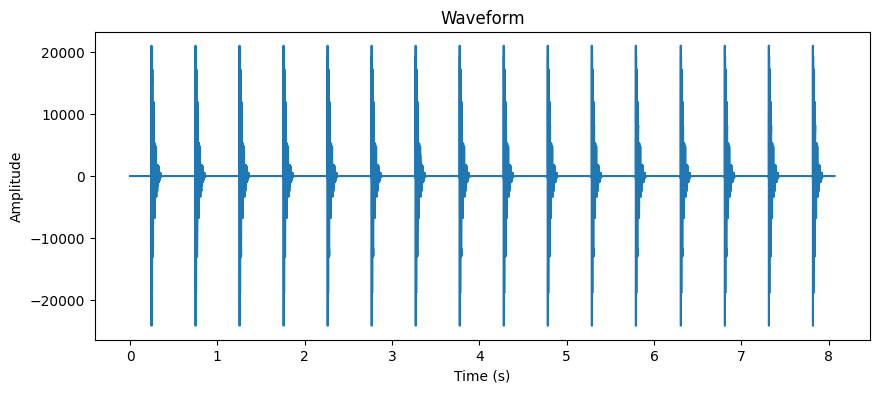

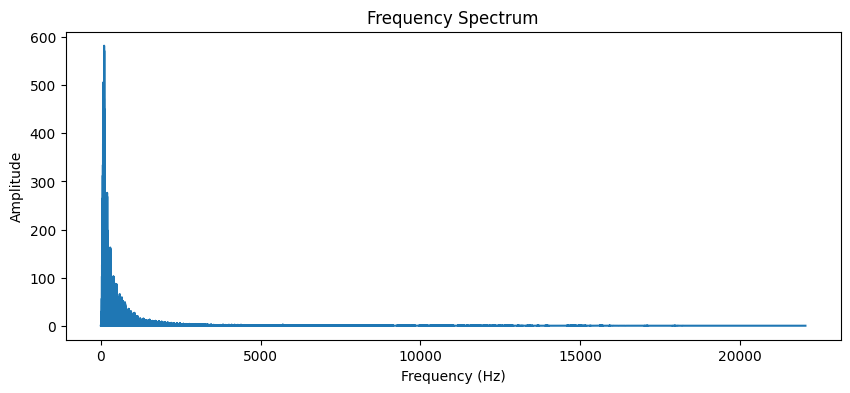

In [14]:
import wave
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq  # Add this line to import fft and fftfreq

# Đọc file WAV
def read_wav(file_path):
    with wave.open(file_path, 'rb') as wav_file:
        params = wav_file.getparams()
        print("Header Info:", params)
        n_channels, sampwidth, framerate, n_frames, _, _ = params[:6]
        data = wav_file.readframes(n_frames)
        samples = np.frombuffer(data, dtype=np.int16)
        if n_channels == 2:  # Stereo, lấy 1 kênh
            samples = samples[::2]
        return samples, framerate

# Hiển thị dạng sóng
def plot_waveform(samples, framerate):
    time = np.linspace(0, len(samples) / framerate, num=len(samples))
    plt.figure(figsize=(10, 4))
    plt.plot(time, samples)
    plt.title("Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

# Phân tích phổ
def plot_frequency_spectrum(samples, framerate):
    N = len(samples)
    yf = fft(samples)
    xf = fftfreq(N, 1 / framerate)[:N // 2]
    plt.figure(figsize=(10, 4))
    plt.plot(xf, 2.0 / N * np.abs(yf[:N // 2]))
    plt.title("Frequency Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.show()

# Main function
if __name__ == "__main__":
    file_path = "./WAV/102888__uknow-dude__drum-loop-solo-kick-119-bpm.wav"  # Thay bằng đường dẫn file WAV
    samples, framerate = read_wav(file_path)
    plot_waveform(samples, framerate)
    plot_frequency_spectrum(samples, framerate)


### Cấu trúc file WAV

In [21]:
file_path = "./WAV/102888__uknow-dude__drum-loop-solo-kick-119-bpm.wav"  # Thay đổi thành đường dẫn tới file của bạn

# Mở file ở chế độ nhị phân ('rb') và đọc nội dung của nó
with open(file_path, "rb") as file:
    # Đọc toàn bộ dữ liệu trong file
    data = file.read()

    # Lấy ra phần đầu của file (header)
    header = data[:44]  # Thông thường header WAV có độ dài 44 byte

    # Lặp qua các byte của header và in ra nhị phân
    for byte in header:
        print(f'{byte:08b}')


01010010
01001001
01000110
01000110
11111100
10110110
00010101
00000000
01010111
01000001
01010110
01000101
01100110
01101101
01110100
00100000
00010000
00000000
00000000
00000000
00000001
00000000
00000010
00000000
01000100
10101100
00000000
00000000
00010000
10110001
00000010
00000000
00000100
00000000
00010000
00000000
01100100
01100001
01110100
01100001
11011000
10110110
00010101
00000000


In [22]:
import os

# Đường dẫn tới file WAV
file_path = "./WAV/102888__uknow-dude__drum-loop-solo-kick-119-bpm.wav"

# Lấy kích thước file (tính bằng byte)
file_size = os.path.getsize(file_path)

# Hiển thị kích thước file
print(f"Kích thước thực tế của file âm thanh: {file_size} bytes")


Kích thước thực tế của file âm thanh: 1423108 bytes
